In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv("10_Data.csv", encoding = 'cp949')
df1_clean = df1.dropna()

In [ ]:
df1['실링압력'].quantile(0.8)

211.285

In [ ]:
df1['실링압력'].quantile(0.2)

204.9272

In [ ]:
cond1 = (df1['실링압력']>=df1['실링압력'].quantile(0.8))
df1.loc[cond1, '압력분류'] = 'A'
df1.loc[~cond1, '압력분류'] = 'B'

In [ ]:
df1

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,압력분류
0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,B
1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83,A
2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55,B
3,7,C005,2동 쿠커 #4,2011-01-03,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81,B
4,2,C007,프리머 #1,2011-01-03,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24064,1,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,72.136538,117.336538,152.813288,23.651,203.823,71.54,B
24065,2,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,71.874219,106.174219,141.470619,23.531,207.574,76.03,B
24066,3,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,72.942705,119.742705,155.733955,23.994,210.006,74.50,B
24067,4,D088,냉동밥 내포장#1,2021-10-29,1BA03606,콩콩푸드밥3kg,W005,70.664452,65.764452,100.773102,23.339,209.513,72.12,B


In [ ]:
cond2 = (df1['쿠킹스팀압력'] >= df1['쿠킹스팀압력'].median())
df1.loc[cond2, '스팀분류'] = 'T'
df1.loc[~cond2, '스팀분류'] = 'F'

In [ ]:
# 범주형 데이터 간 연관성이 있는지 가설검정 수행
df_contingency = pd.crosstab(df1['압력분류'], df1['스팀분류'])
df_contingency

스팀분류,F,T
압력분류,,
A,872,3944
B,11136,8117


In [ ]:
from scipy import stats
stats.chi2_contingency(df_contingency)  # 통계랑 / p-value / 자유도 / 기댓값

(2431.2536760834837, 0.0, 1, array([[2402.6975778, 2413.3024222],
        [9605.3024222, 9647.6975778]]))

# 미션 8

In [ ]:
# 00. 1번 데이터를 불러온 뒤 df1으로 선언
df1 = pd.read_csv("01_Data.csv", encoding = 'utf-8')
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,개인,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,개인,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,개인,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,개인,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드


In [ ]:
# 01.
df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']

In [ ]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,802800
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,802800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행,5814000
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고,5814000
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드,4715100
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,5814000


In [ ]:
df1['Total_Amount'].describe()

count    5.130100e+04
mean     5.315394e+06
std      1.455794e+06
min      6.624000e+05
25%      4.914000e+06
50%      5.814000e+06
75%      5.814000e+06
max      1.006200e+07
Name: Total_Amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


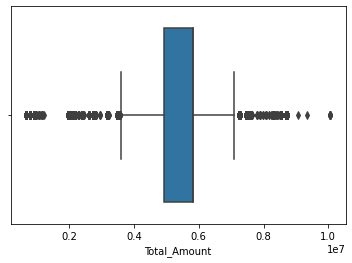

In [ ]:
import seaborn as sns

sns.boxplot(df1['Total_Amount'])

In [ ]:
np.percentile(df1['Total_Amount'].values, 90)

6354000.0

In [ ]:
df1['Total_Amount'].quantile(0.9)

6354000.0

In [ ]:
# 02.
import numpy as np

#cond1 = (df1['Total_Amount'] >= np.percentile(df1['Total_Amount'].values, 90))
#df1.loc[cond1, 'Member_Rank'] = 'VIP'
#cond2 = ((cond1)& df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.7))
#df1.loc[cond2, 'Member_Rank'] = 'Special'

'''
list_li = []
for row in df1['Total_Amount']:
  if row >= np.percentile(df1['Total_Amount'].values, 90):
    list_li.append('VIP')
    elif row >= (np.percentile(df1['Total_Amount'].values, 90) & df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.7)):
      list_li.append('Special')
  else:
    list_li.append('Normal')

df1['Total_Amount'] = list_li
df1['Total_Amount'].value_counts()
'''


SyntaxError: ignored

In [ ]:
def func1(row) :
    if row >=df1['Total_Amount'].quantile(0.9) :
        return 'VIP'
    elif row >= df1['Total_Amount'].quantile(0.7) :
        return 'special'
    else:
        return 'Normal'
    
df1['Member_Rank'] = df1['Total_Amount'].apply(func1)
df1['Member_Rank'].value_counts()

special    21145
Normal     20909
VIP         9247
Name: Member_Rank, dtype: int64

    Channel          mean          sum
             Total_Amount Total_Amount
0     대형마트A  6.657713e+06   6637739400
1     대형마트C  6.534000e+06     52272000
2     대형마트E  6.697143e+06   3100777200
3     대형마트H  6.498000e+06    506844000
4      영업방판  6.731221e+06  43739475300
5    자체홈페이지  6.452250e+06    154854000
6       재계약  6.354000e+06      6354000
7      전단홍보  6.794096e+06   1698524100
8     전문매장H  6.638545e+06   2144250000
9     전문매장Z  6.602187e+06   1340244000
10   직영계열사B  7.074000e+06      7074000
11    직영유통사  6.507000e+06     58563000
12   홈쇼핑/방송  6.518552e+06   1701342000
13  홈쇼핑/인터넷  6.476565e+06    848430000


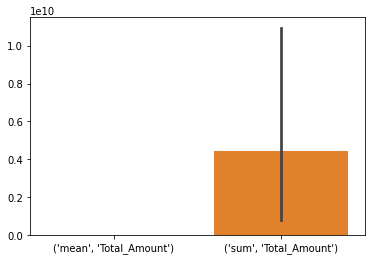

In [ ]:
# 03.
df1_vip = df1.loc[df1['Member_Rank'] == 'VIP']
df1_vip_ms = df1_vip.pivot_table(index = 'Channel', values = 'Total_Amount', aggfunc = ['mean', 'sum']).reset_index()
df1_vip_ms
print(df1_vip_ms)

sns.barplot(data = df1_vip_ms)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49660 missing from current font.
  font.set_

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49660 missing from current font.
  font.set_text(s, 0,

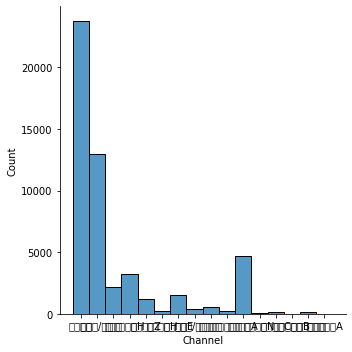

In [ ]:
# 3. 앞서 계산된 'Member_Rank'에서 'VIP'고객들의 특성을 파악하고 한다.
#     'VIP'고객들만 추출하여, 'Channel'(유입경로)에 따른 
#'Total_Amount'(총금액)의 평균을 시각화 / 합 시각화

import matplotlib.pyplot as mpl
#mpl.rc('font',family='AppleGothic') #  그래프 글꼴 설정 (Mac)
mpl.rc('font', family ='Malgun Gothic')

cond1=(df1['Member_Rank']=='VIP')
df2=df1.loc[cond1]
df3=df2.pivot_table(index='Channel',values='Total_Amount',aggfunc=['mean','sum']).reset_index
df3
import scipy.stats as stats
sns.displot(data=df1,x='Channel')
# sns.countplot(data=df3, x='Channel')

In [ ]:
# 04.
'''
df1_vip_ms_top3 = df1_vip_ms.sort_values(by = ('sum', 'Total_Amount'), ascending = False).head(3)
print(df1_vip_ms_top3)

F_statistic, pVal = stats.f_oneway(df1_vip_ms_top3[df1_vip_ms_top3['Channel']=='영업방판'][('mean','Total_Amount')],
                                   df1_vip_ms_top3[df1_vip_ms_top3['Channel']=='대형마트A'][('mean','Total_Amount')],
                                   df1_vip_ms_top3[df1_vip_ms_top3['Channel']=='대형마트E'][('mean','Total_Amount')])

F_statistic, pVal = stats.f_oneway(df1_vip_ms_top3[df1_vip_ms_top3['Channel']=='영업방판'][:],
                                   df1_vip_ms_top3[df1_vip_ms_top3['Channel']=='대형마트A'][:],
                                   df1_vip_ms_top3[df1_vip_ms_top3['Channel']=='대형마트E'][:])

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
'''

  Channel          mean          sum
           Total_Amount Total_Amount
4    영업방판  6.731221e+06  43739475300
0   대형마트A  6.657713e+06   6637739400
2   대형마트E  6.697143e+06   3100777200


ValueError: ignored

In [ ]:
# 04.
df3=df2.pivot_table(index='Channel',values='Total_Amount',aggfunc=['sum'])
df3.sort_values(('sum','Total_Amount'),ascending=False).head(3)


cond1 = (df1['Channel']=='영업방판')
cond2 = (df1['Channel']=='대형마트A')
cond3 = (df1['Channel']=='대형마트E')
df_A = df1.loc[cond1]
df_B = df1.loc[cond2]
df_C = df1.loc[cond3]

from scipy.stats import f_oneway
f_oneway(df_A['Total_Amount'],df_B['Total_Amount'],df_C['Total_Amount'])
# pvalue가 0.05보다 작으므로 대립가설 기각

F_onewayResult(statistic=587.8532576810699, pvalue=3.771147271733449e-251)

In [ ]:
# 05.
dd = pd.crosstab(df1['Member_Rank'], df1['Product_Type'])
print(dd)

stats.chi2_contingency(dd)

Product_Type  DES-1  DES-2  DES-3A  DES-R4  ERA  MMC
Member_Rank                                         
Normal        10414   8478    1366       7  644    0
VIP            8582    141      84     320    0  120
special       20137    377     631       0    0    0


(17400.408970458084,
 0.0,
 10,
 array([[15949.62860373,  3666.54381006,   848.16336914,   133.27699265,
           262.47823629,    48.90898813],
        [ 7053.71924524,  1621.52807937,   375.10003704,    58.94171654,
           116.08093409,    21.62998772],
        [16129.65215103,  3707.92811056,   857.73659383,   134.78129081,
           265.44082961,    49.46102415]]))

In [ ]:
df1[df1['Member_Rank'] == "special"]

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount,Member_Rank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000,special
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000,special
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000,special
6,7,66751017,렌탈,패키지계약,홈쇼핑/방송,2019-01-30,60,카드이체,DES-1,98400,...,경상도,경상도,계약확정,0,없음,남자,1.0,롯데카드,5904000,special
8,9,66758007,렌탈,일반계약,영업방판,2019-06-30,60,카드이체,DES-3A,102900,...,경상도,경상도,계약확정,0,없음,여자,2.0,롯데카드,6174000,special
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51295,51297,66792261,렌탈,일반계약,홈쇼핑/방송,2019-03-11,60,카드이체,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,1.0,롯데카드,5814000,special
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행,5814000,special
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고,5814000,special
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,5814000,special


In [ ]:
# 06.
df1_sp = df1[df1['Member_Rank'] == 'special']
df1_sp['Datetime'] = pd.to_datetime(df1_sp['Datetime'])
df1_sp['YY'] = df1_sp['Datetime'].dt.year
df1_sp['MM'] = df1_sp['Datetime'].dt.month

print(df1_sp[df1_sp['YY'] == 2019]['MM'].value_counts())
print(df1_sp[df1_sp['YY'] == 2020]['MM'].value_counts())

2     2740
3     2014
1     1779
4     1496
7     1429
10    1335
5     1212
12    1161
6     1118
8      969
9      958
11     647
Name: MM, dtype: int64
2    835
1    785
3    704
7    563
4    553
5    383
6    359
8    105
Name: MM, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# 07. 
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1['YY'] = df1['Datetime'].dt.year
df1['MM'] = df1['Datetime'].dt.month
df12 = df1.pivot_table(index = 'Product_Type', columns = 'YY', values = 'Total_Amount', aggfunc = 'sum').reset_index()
# print(df12)
(df12[2020] - df12[2019]) / df12[2019]


0   -0.745103
1   -0.752126
2   -0.745276
3   -0.747889
4   -0.774864
5   -0.703884
dtype: float64

In [ ]:
df1['Credit_Rank'].value_counts()

1.0     10778
2.0      8227
4.0      5380
3.0      4997
5.0      4317
6.0      3818
7.0      2718
8.0      1540
9.0       639
0.0        60
10.0       46
Name: Credit_Rank, dtype: int64

In [ ]:
# 08.
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
#!pip install missingno
import missingno as msno
#한글 글꼴 설정
# mpl.rc('font', family ='Malgun Gothic')
mpl.rc('font',family='AppleGothic') #  그래프 글꼴 설정 (Mac)
# 파이프라인 구축
from sklearn.pipeline import make_pipeline

# 결측치 처리
from sklearn.impute import SimpleImputer

# 스케일링과 인코딩
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 숫자는 숫자끼리, 문자는 문자끼리 처리될 수 있도록 파이프라인 별도 구성
# 두 파이프라인 병합
from sklearn.compose import make_column_transformer
# model = DecisionTreeRegressor

# 학습 알고리즘 호출하기
from sklearn.tree import DecisionTreeRegressor

# 숫자가 처리되는 Process 구축하기 (1. 중앙값으로 결측치 처리 -> 2. MinMax Scaling으로 처리)
numeric_pipe = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())
numeric_pipe

# 문자가 처리되는 Process 구축 (1. 최빈값으로 결측처리 -> 2. 인코딩)
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                              OneHotEncoder())
category_pipe

# 해약확률을 구하기 위해서 인코딩 함
df1['Target'] = df1['Credit_Rank'].replace({'1':1, '2':1,
                      '3':1, '4':1, '5':1, '6':0, '7':0, '8':0, '9':0, '10':0})

X = df1[['Age', 'Amount_Month', 'Term', 'Gender', 'Product_Type']]
Y = df1['Target']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state = 1234)

# 숫자는 숫자끼리, 문자는 문자끼리 처리되도록 파이프 구성하기
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list), (category_pipe, category_list))
preprocessing_pipe

# 특성공학 + 학습
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe.fit(X_train, Y_train)

# 평가
from sklearn.metrics import explained_variance_score

Y_train_pred = model_pipe.predict(X_train)
Y_test_pred = model_pipe.predict(X_test)

print(explained_variance_score(Y_train, Y_train_pred))
print(explained_variance_score(Y_test, Y_test_pred))

ValueError: ignored

In [ ]:
df1['State'].value_counts()

계약확정     50620
해약확정       622
기간만료        45
해약진행중       14
Name: State, dtype: int64

In [ ]:
df1['Contract_Type'].value_counts()

프로모션계약    15811
일반계약      15321
패키지계약     10186
교체계약       4975
멤버십3유형     2627
멤버십2유형     2086
단체계약        190
멤버십4유형       92
멤버십1유형       13
Name: Contract_Type, dtype: int64

In [ ]:
# 09.
df2 = df1[df1['State'].isin(['계약확정', '기간만료'])]
df2['계약'] = df2[df2['State'] == '계약확정']['State'] + [df2['State'] == '기간만료']['State']
df2_pt = df2.pivot_table(index='Product_Type', columns = '계약', values = 'Total_Amount', aggfunc = ['count', 'sum']).reset_index()
df2_pt

TypeError: ignored

In [ ]:
# 09.
df2 = df1.pivot_table(index=['Product_Type'],values='Contract_Type',aggfunc='count')
df4 = df1.pivot_table(index=['Product_Type'],values='Total_Amount',aggfunc='sum')
df2['Total_Amount'] = df4['Total_Amount']
df2['총금액/계약건수'] = df2['Total_Amount'] / df2['Contract_Type']
df2

,Contract_Type,Total_Amount,총금액/계약건수
Product_Type,,,
DES-1,39133,209786169096,5.360851e+06
DES-2,8996,44744720760,4.973846e+06
DES-3A,2081,11745786960,5.644299e+06
DES-R4,327,2514207600,7.688708e+06
ERA,644,3007508400,4.670044e+06
MMC,120,886626000,7.388550e+06


In [ ]:
df2 = df1.pivot_table(index='Product_Type', columns = 'Contract_Type', values = 'Total_Amount', aggfunc = ['count', 'sum'])
#df2['총금액/계약건수'] = df2['Total_Amount'] / df2['Contract_Type']
df2


count                                                       \
Contract_Type    교체계약  단체계약 멤버십1유형  멤버십2유형  멤버십3유형 멤버십4유형     일반계약   패키지계약   
Product_Type                                                                 
DES-1          4854.0  83.0   13.0  2086.0  2529.0   75.0  13187.0  5091.0   
DES-2            75.0  96.0    NaN     NaN    91.0   12.0   1528.0  4981.0   
DES-3A            NaN  11.0    NaN     NaN     NaN    5.0    318.0   110.0   
DES-R4           46.0   NaN    NaN     NaN     7.0    NaN    259.0     NaN   
ERA               NaN   NaN    NaN     NaN     NaN    NaN     13.0     4.0   
MMC               NaN   NaN    NaN     NaN     NaN    NaN     16.0     NaN   

                                 sum                                         \
Contract_Type   프로모션계약          교체계약         단체계약      멤버십1유형        멤버십2유형   
Product_Type                                                                  
DES-1          11215.0  2.865080e+10  498083400.0  12848400.0  4.306608e+09   
DES-2           2213.0  3.591108e+08  425691720.0         NaN           NaN   
DES-3A          1637.0           NaN   66078000.0         NaN           NaN   
DES-R4            15.0  3.423240e+08          NaN         NaN           NaN   
ERA              627.0           NaN          NaN         NaN           NaN   
MMC              104.0           NaN          NaN         NaN           NaN   

                                                                      \
Contract_Type        멤버십3유형       멤버십4유형          일반계약         패키지계약   
Product_Type                                                           
DES-1          2.048944e+09  184136400.0  7.768379e+10  2.605652e+10   
DES-2          6.041880e+07   32788800.0  7.589716e+09  2.485774e+10   
DES-3A                  NaN   13662000.0  1.904089e+09  6.382800e+08   
DES-R4         6.375600e+06          NaN  2.037258e+09           NaN   
ERA                     NaN          NaN  6.153030e+07  1.769040e+07   
MMC                     NaN          NaN  1.158768e+08           NaN   

                             
Contract_Type        프로모션계약  
Product_Type                 
DES-1          7.034444e+10  
DES-2          1.141925e+10  
DES-3A         9.123678e+09  
DES-R4         1.282500e+08  
ERA            2.928288e+09  
MMC            7.707492e+08